In [1]:
!nvidia-smi

Thu Jan  8 00:53:47 2026       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.92       Driver Version: 528.92       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   44C    P0    11W /  60W |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import Image, display
HOME = os.getcwd()
print(HOME)

C:\Users\acer\Downloads


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

# Check if you have the experimental Numpy issue
import numpy
print(f"NumPy Version: {numpy.__version__}")

NumPy Version: 2.4.0


In [5]:
dataset_path = r"C:\Users\acer\Downloads\skin.v1i.folder"

if os.path.exists(dataset_path):
    print("✅ Dataset path found.")
else:
    print("❌ Dataset path NOT found. Training will fail immediately.")

✅ Dataset path found.


In [6]:
import psutil

# Check if your RAM is maxed out
ram = psutil.virtual_memory()
print(f"RAM Usage: {ram.percent}%")

# Check if the CPU is overwhelmed
print(f"CPU Usage: {psutil.cpu_percent()}%")

RAM Usage: 71.8%
CPU Usage: 11.4%


In [7]:
model = YOLO("yolov8n-cls.pt")

# Use 'verbose=True' to see more logs
# Use 'batch=-1' to let YOLO automatically find the best speed for your RAM
results = model.train(
    data=dataset_path, 
    epochs=10, 
    imgsz=224, 
    verbose=True,  # Shows detailed logs of every step
    batch=-1       # Prevents 'Out of Memory' crashes by auto-adjusting
)

Ultralytics 8.3.249  Python-3.13.3 torch-2.9.1+cpu CPU (12th Gen Intel Core i5-12450H)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\acer\Downloads\skin.v1i.folder, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0,

Displaying: confusion_matrix.png


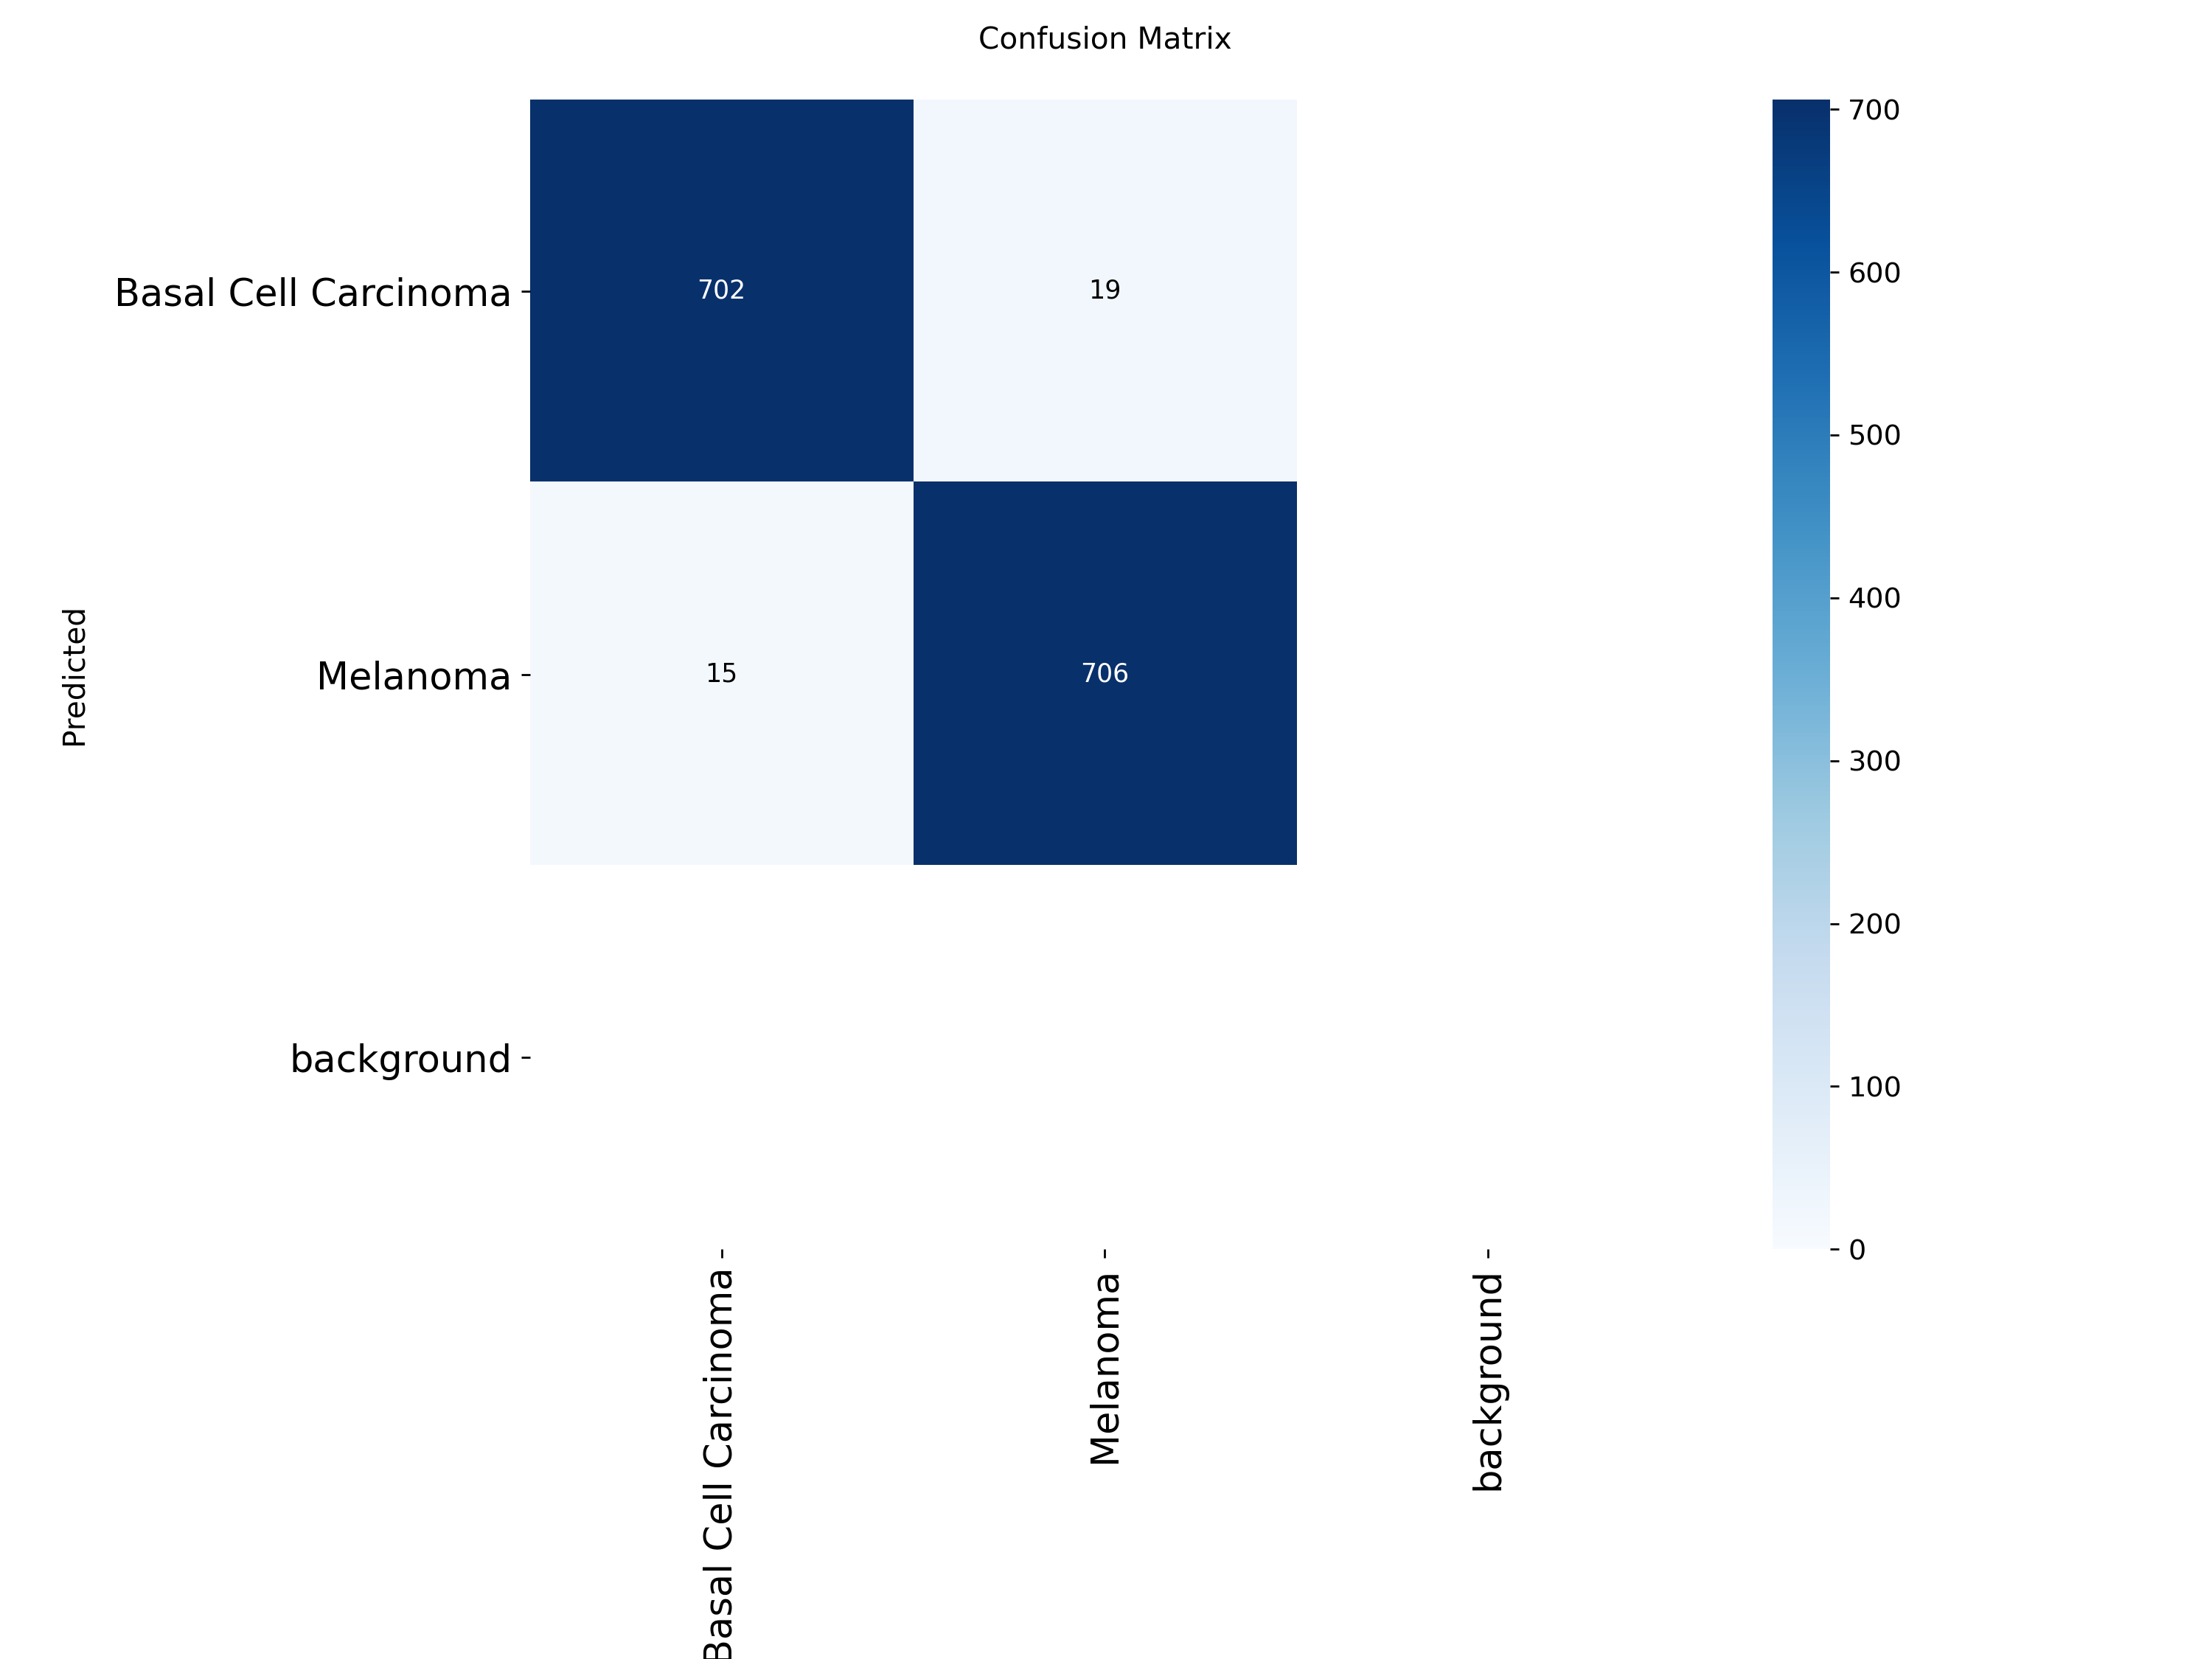

Displaying: results.png


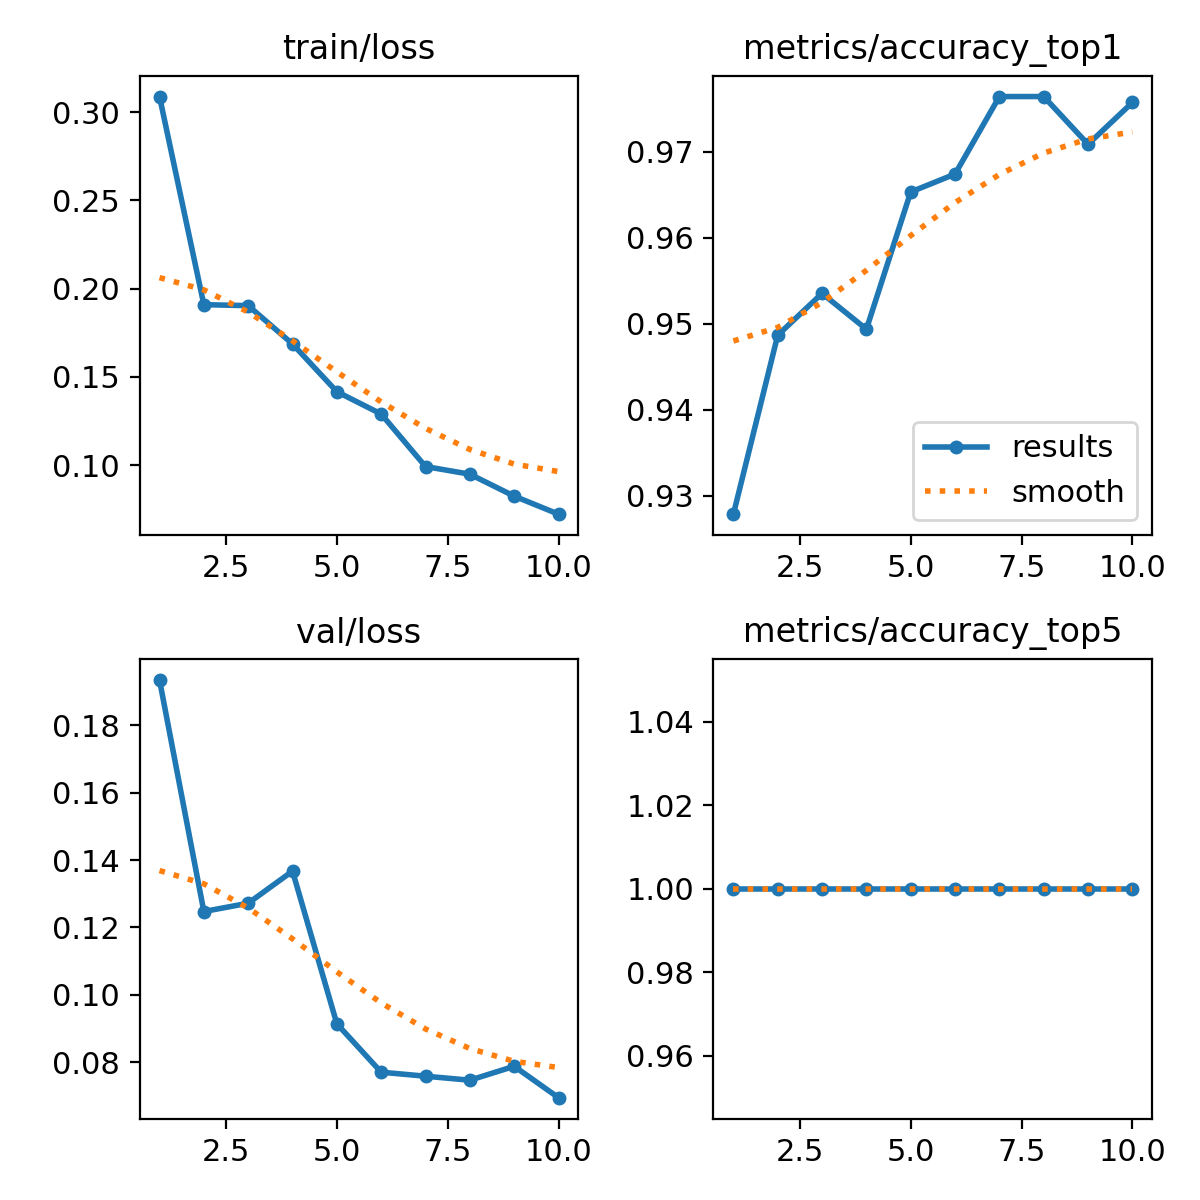

In [14]:
# Use the directory from the results object you just created
latest_results = results.save_dir

# List of files we want to see
files_to_show = ['confusion_matrix.png', 'results.png']

for plot_file in files_to_show:
    path = os.path.join(latest_results, plot_file)
    if os.path.exists(path):
        print(f"Displaying: {plot_file}")
        display(Image(filename=path, width=600))
    else:
        print(f"File not found: {path}. Is the training finished?")

In [12]:
# The 'results' object from your model.train() contains the final metrics
print("\n--- Final Model Metrics ---")
print(f"Top-1 Accuracy: {results.results_dict['metrics/accuracy_top1']:.4f}")
print(f"Top-5 Accuracy: {results.results_dict['metrics/accuracy_top5']:.4f}")
print(f"Final Fitness: {results.fitness:.4f}")


--- Final Model Metrics ---
Top-1 Accuracy: 0.9764
Top-5 Accuracy: 1.0000
Final Fitness: 0.9882
